In [17]:
%matplotlib inline
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data_df, ride_data_df, on="city", how="left")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [18]:
#Calculate the Average Fare ($) Per City
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [19]:
#Calculate the Total Number of Rides Per City
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

## Bubble Plot of Ride Sharing Data

In [20]:
#Calculate the Total Number of Drivers Per City
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [21]:
#City Type (Urban, Suburban, Rural)
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [22]:
pyber_city_df = pd.DataFrame({"Average Fare":average_fare,
                 "Total Rides": total_rides,
                 "Total Drivers": total_drivers,
                 "City Type": city_type})

pyber_city_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [23]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = pyber_city_df.loc[pyber_city_df["City Type"] == "Urban"]
suburban_cities = pyber_city_df.loc[pyber_city_df["City Type"] == "Suburban"]
rural_cities = pyber_city_df.loc[pyber_city_df["City Type"] == "Rural"]
print([urban_cities], [suburban_cities], [rural_cities])

[                      Average Fare  Total Rides  Total Drivers City Type
Amandaburgh              24.641667           18             12     Urban
Barajasview              25.332273           22             26     Urban
Carriemouth              28.314444           27             52     Urban
Christopherfurt          24.501852           27             41     Urban
Deanville                25.842632           19             49     Urban
East Kaylahaven          23.757931           29             65     Urban
Erikaland                24.906667           12             37     Urban
Grahamburgh              25.221200           25             61     Urban
Huntermouth              28.993750           24             37     Urban
Hurleymouth              25.891429           28             36     Urban
Jerryton                 25.649200           25             64     Urban
Johnton                  26.785714           21             27     Urban
Joneschester             22.289600           25   

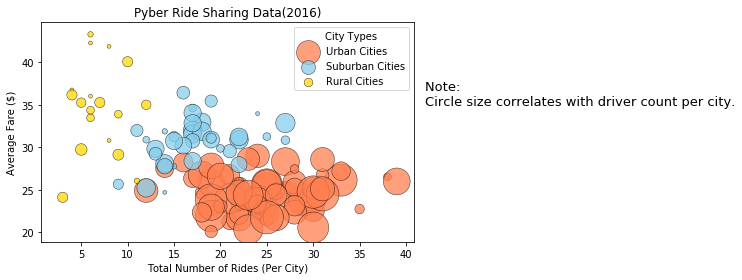

In [24]:
# Build the scatter plots for each city types

#Urban Cities
plt.scatter(x=urban_cities["Total Rides"], 
            y=urban_cities["Average Fare"], 
            marker="o", 
            facecolors="coral", 
            edgecolors="black", 
            s=urban_cities["Total Drivers"]*15, 
            label="Urban Cities", 
            alpha=0.75, 
            linewidth=0.5)

#Suburban Cities
plt.scatter(x=suburban_cities["Total Rides"], 
            y=suburban_cities["Average Fare"], 
            marker="o", 
            facecolors="skyblue", 
            edgecolors="black", 
            s=suburban_cities["Total Drivers"]*15, 
            label="Suburban Cities", 
            alpha=0.75, 
            linewidth=0.5)

#Rural Cities
plt.scatter(x=rural_cities["Total Rides"], 
            y=rural_cities["Average Fare"], 
            marker="o", 
            facecolors="gold", 
            edgecolors="black", 
            s=rural_cities["Total Drivers"]*15, 
            label="Rural Cities", 
            alpha=0.75, 
            linewidth=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(title="City Types")


# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 13)  

# Save Figure
plt.tight_layout()
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016_Scatter.png")

# Show plot
plt.show()

In [25]:
# Calculate Type Percents
pyber_fare = pyber_data.groupby(["type"])["fare"].sum()
pyber_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [26]:
# Create pyber_fare index for pie labels
pyber_fare.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

## Total Fares by City Type

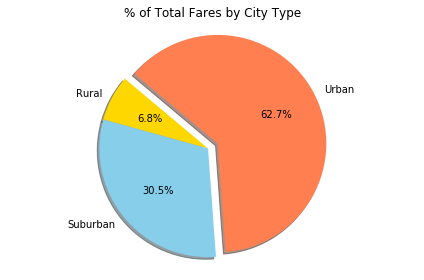

In [27]:
# Build Pie Chart

#Assign colors foreach section of the pie chart in sequence with index.
colors = ["gold", "skyblue", "coral"]

#Explode the largest section of the pie chart by index position.

explode = (0, 0, 0.1)

#Pie chart
plt.pie(pyber_fare, labels = pyber_fare.index, 
        autopct = "%1.1f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, 
        startangle = 140)

plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.tight_layout()
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016_Fares.png")

# Show Figure
plt.show()

In [28]:
# Calculate Ride Percents
pyber_rides = pyber_data.groupby(["type"])["ride_id"].count()
pyber_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [29]:
#Create pyber_rides index for pie labels
pyber_rides.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

## Total Rides by City Type

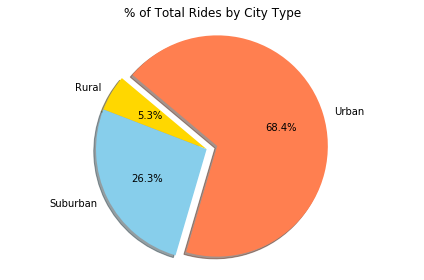

In [30]:
# Build Pie Chart

#Assign colors foreach section of the pie chart in sequence with index.
colors = ["gold", "skyblue", "coral"]

#Explode the largest section of the pie chart by index position.
explode = (0, 0, 0.1)

#Pie chart.
plt.pie(pyber_rides, labels = pyber_rides.index, 
        autopct = "%1.1f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True,
        startangle = 140)

plt.axis("equal")

plt.title("% of Total Rides by City Type")

# Save Figure
plt.tight_layout()
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016_Rides.png")

# Show Figure
plt.show()

In [31]:
# Calculate Driver Percents
pyber_drivers = pyber_data.groupby(["type"])["driver_count"].mean()
pyber_drivers

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [32]:
#Create pyber_drivers index for pie labels
pyber_drivers.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

## Total Drivers by City Type

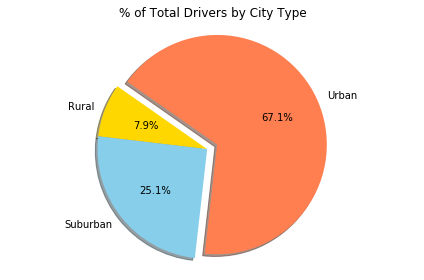

In [33]:
# Build Pie Charts

#Assign colors foreach section of the pie chart in sequence with index.
colors = ["gold", "skyblue", "coral"]

#Explode the largest section of the pie chart by index position.
explode = (0, 0, 0.1)

#Pie chart.
plt.pie(pyber_drivers, labels = pyber_drivers.index, 
        autopct = "%1.1f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True,
        startangle = 145)


plt.axis("equal")

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.tight_layout()
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016_Drivers.png")

# Show Figure
plt.show()